Summary: 
- Recreated entropy blowup curve, showing that entropy rate of GPT-2 text drifts upwards over time. 
- Empirically determined that top 1000 tokens represent ~95% of the probability mass => nucleus sampling of 0.95 will capture ~ top 1000 words, and top k sampling with k = 1000 captures 95+% of the probability mass.

In [13]:
%matplotlib inline

import os
import sys
sys.path.append('../examples')

import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [ ]:
import gpt2_generate_with_entropy as gen

## Experiment 1: Recreating entropy blowup curve

Generated 10000 independent samples of length 100. Curve decreases until around 20 tokens and slowly increases after that. 

In [ ]:
# 10 independent generations / sample
ents = gen.run("To be or not to be, that is the question:", num_samples=1000, length=100) 

Text(0.5, 1.0, 'Entropy blowup')

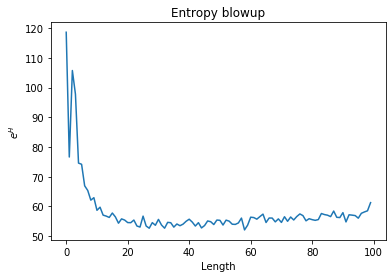

In [31]:
avg_ents = ents.cpu().numpy()[0]

figure, axis = plt.subplots()
axis.plot(np.exp(avg_ents))
axis.set_xlabel('Length')
axis.set_ylabel('$e^H$')
axis.set_title('Entropy blowup')

Text(0.5, 1.0, 'Entropy blowup post 20 generations')

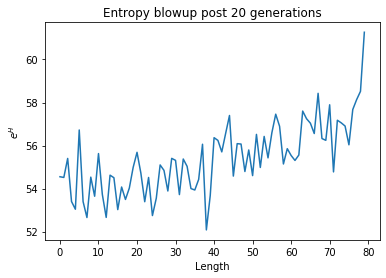

In [32]:
figure, axis = plt.subplots()
axis.plot(np.exp(avg_ents[20:]))
axis.set_xlabel('Length')
axis.set_ylabel('$e^H$')
axis.set_title('Entropy blowup post 20 generations')

## Experiment 2: Empirically checking probability mass

Informally checked the language model learned by GPT-2. Two examples shown below. In practice, 95% of the probability mass is contained within the top 1000 words. 

In [ ]:
outputs = gen.get_distr("The place I like best in this world is the kitchen.")

In [44]:
next_token_logits = outputs[0][:, -1, :]
next_probs = F.softmax(next_token_logits, dim=-1)
prob = next_probs.mean(axis=0).cpu().numpy()

Text(0.5, 1.0, 'Raw language model')

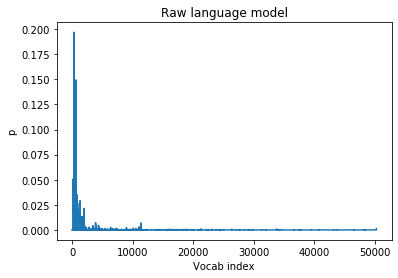

In [45]:
figure, axis = plt.subplots()
axis.plot(prob)
axis.set_xlabel('Vocab index')
axis.set_ylabel('p')
axis.set_title('Raw language model')

Text(0.5, 1.0, 'Sorted language model, 1st 1000 words')

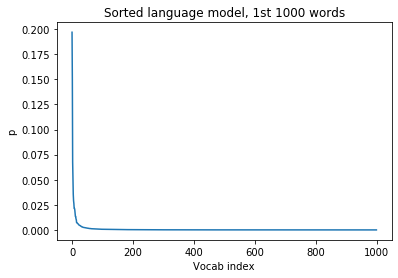

In [46]:
sort_prob = np.sort(prob)[::-1]

figure, axis = plt.subplots()
axis.plot(sort_prob[:1000])
axis.set_xlabel('Vocab index')
axis.set_ylabel('p')
axis.set_title('Sorted language model, 1st 1000 words')

In [47]:
sort_prob[:1000].sum()

0.9652047

In [ ]:
outputs = gen.get_distr("Recent work has improved our ability to detect linguistic knowledge in word representations.")
next_token_logits = outputs[0][:, -1, :]
next_probs = F.softmax(next_token_logits, dim=-1)
prob = next_probs.mean(axis=0).cpu().numpy()

Text(0.5, 1.0, 'Raw language model')

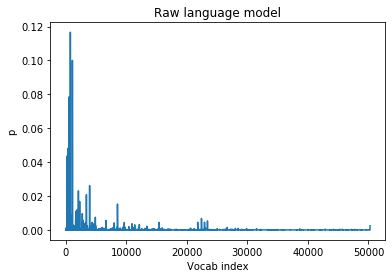

In [49]:
figure, axis = plt.subplots()
axis.plot(prob)
axis.set_xlabel('Vocab index')
axis.set_ylabel('p')
axis.set_title('Raw language model')

Text(0.5, 1.0, 'Sorted language model, 1st 1000 words')

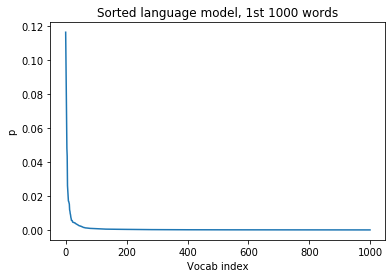

In [50]:
sort_prob = np.sort(prob)[::-1]

figure, axis = plt.subplots()
axis.plot(sort_prob[:1000])
axis.set_xlabel('Vocab index')
axis.set_ylabel('p')
axis.set_title('Sorted language model, 1st 1000 words')

In [51]:
sort_prob[:1000].sum()

0.95362914